In [1]:
%load_ext autoreload
%autoreload 2

from scanalysis import sciplex

from pathlib import Path

import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)

# change this path with the path you have sciplex dataset
data_path = Path('/Users/guardian/sciplex4')

sciplex4_raw = sciplex.SciPlex4(data_path, preprocess=False).dataset

In [2]:
t = sciplex4_raw.obs
t.iloc[:,2:] = t.iloc[:,2:].fillna(0)
sciplex4_raw.obs = t

In [3]:
sc.pp.normalize_total(sciplex4_raw)
sc.pp.log1p(sciplex4_raw)

normalizing counts per cell
    finished (0:00:00)


In [4]:
import cinemaot as co
sciplex4_subset = sciplex4_raw[sciplex4_raw.obs['cell_line'].isin(['A549']),:]
sciplex4_subset = sciplex4_subset[sciplex4_subset.obs['Pracinostat'].isin([0,10]),:]
sciplex4_subset.obs['P'] = 'oneP'
sciplex4_subset.obs['P'].values[sciplex4_subset.obs['Pracinostat']==0] = 'zeroP'
df = sciplex4_subset.obs.drop(['perturbation_raw','cell_line','Pracinostat','Acetate','Citrate','Pyruvate'],axis=1)
sciplex4_subset = sciplex4_subset[df.sum(axis=1)==0,:]

/opt/homebrew/lib/python3.9/site-packages/rpy2/robjects/numpy2ri.py:185: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/opt/homebrew/lib/python3.9/site-packages/rpy2/robjects/pandas2ri.py:261: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/Users/guardian/Desktop/CINEMA-OT/cinemaot/benchmark.py:15: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_45228/816054207.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  scipl

In [5]:
sciplex4_subset.obs

,perturbation_raw,cell_line,ACSS2.inhibitor,DMSO,ACLY.inhibitor,PDH.inhibitor,Pracinostat,Acetate,Abexinostat,Citrate,Pyruvate,Chloride,P
A01_C12_RT_BC_10_Lig_BC_20,"['0', 'DMSO', '0', 'DMSO', 'A549', 'plate10']",A549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,zeroP
A01_C12_RT_BC_10_Lig_BC_64,"['10', 'Acetate', '10', 'Pracinostat', 'A549',...",A549,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,oneP
A01_C12_RT_BC_11_Lig_BC_61,"['2', 'Citrate', '10', 'Pracinostat', 'A549', ...",A549,0.0,0.0,0.0,0.0,10.0,0.0,0.0,2.0,0.0,0.0,oneP
A01_C12_RT_BC_11_Lig_BC_70,"['10', 'Acetate', '10', 'Pracinostat', 'A549',...",A549,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,oneP
A01_C12_RT_BC_11_Lig_BC_91,"['2', 'Citrate', '0', 'DMSO', 'A549', 'plate3']",A549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,zeroP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
H12_C12_RT_BC_95_Lig_BC_17,"['5', 'Pyruvate', '10', 'Pracinostat', 'A549',...",A549,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,5.0,0.0,oneP
H12_C12_RT_BC_95_Lig_BC_57,"['10', 'Citrate', '0', 'DMSO', 'A549', 'plate3']",A549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,zeroP
H12_C12_RT_BC_9_Lig_BC_39,"['5', 'Pyruvate', '0', 'DMSO', 'A549', 'plate3']",A549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,zeroP
H12_C12_RT_BC_9_Lig_BC_57,"['5', 'Acetate', '0', 'DMSO', 'A549', 'plate3']",A549,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,zeroP


In [8]:
#sc.pp.subsample(sciplex4_subset,n_obs=10000,random_state=0)

sciplex4_subset_ = sciplex4_subset
sciplex4_subset_.obs.iloc[:,3:13] = sciplex4_subset_.obs.iloc[:,3:13].astype("category")
sc.pp.pca(sciplex4_subset_)
cf_m, match_m = co.benchmark.mixscape(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP',return_te=False)
cf_h, match_h = co.benchmark.harmony_mixscape(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP',return_te=False)
cf_o, match_o = co.benchmark.OT(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP',thres=0.2,return_te=False)
cf_c, match_c, diff_c = co.cinemaot.cinemaot_unweighted(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP', thres=0.6,smoothness=5e-4)
metric_m = co.benchmark.evaluate_batch(cf_m, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)
metric_h = co.benchmark.evaluate_batch(cf_h, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)
metric_o = co.benchmark.evaluate_batch(cf_o, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)
metric_c = co.benchmark.evaluate_batch(cf_c, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)

computing PCA
    with n_comps=50
    finished (0:00:10)


2022-07-13 01:00:20,221 - harmonypy - INFO - Iteration 1 of 10
2022-07-13 01:00:21,748 - harmonypy - INFO - Iteration 2 of 10
2022-07-13 01:00:23,406 - harmonypy - INFO - Converged after 2 iterations
/opt/homebrew/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(


computing PCA
    with n_comps=15
    finished (0:00:00)
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99683577 0.992485   0.98926616 0.9832935  0.9807428
     0.97888863 0.9687171  0.9658147  0.95735717 0.9550806  0.9534024
     0.95172757 0.9477547  0.94596386]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
Silhouette score...
PC regression...
computing PCA
    with n_comps=50
    finished (0:00:10)
computing PCA
    with n_comps=50
    finished (0:00:00)
Variance contribution increased after integration!
Setting PCR comparison score to 0.
Isolated labels ASW...


In [24]:
metric_m.columns = ['Mixscape']
metric_h.columns = ['Harmony']
metric_o.columns = ['OT']
metric_c.columns = ['CINEMA-OT']
metrics = pd.concat([metric_m,metric_h,metric_o,metric_c],axis=1)
metrics

,Mixscape,Harmony,OT,CINEMA-OT
NMI_cluster/label,NaN,NaN,NaN,NaN
ARI_cluster/label,NaN,NaN,NaN,NaN
ASW_label,0.486030,0.483214,0.489855,0.493263
ASW_label/batch,0.557195,0.823720,0.657716,0.905570
PCR_batch,0.000000,0.642700,0.979432,0.817497
cell_cycle_conservation,NaN,NaN,NaN,NaN
isolated_label_F1,NaN,NaN,NaN,NaN
isolated_label_silhouette,0.526584,0.505917,0.519985,0.503758
graph_conn,0.658794,0.876171,0.652627,0.863484
kBET,NaN,NaN,NaN,NaN


In [29]:
sciplex4_subset = sciplex4_raw[sciplex4_raw.obs['cell_line'].isin(['MCF7']),:]
sciplex4_subset = sciplex4_subset[sciplex4_subset.obs['Pracinostat'].isin([0,10]),:]
sciplex4_subset.obs['P'] = 'oneP'
sciplex4_subset.obs['P'].values[sciplex4_subset.obs['Pracinostat']==0] = 'zeroP'
df = sciplex4_subset.obs.drop(['perturbation_raw','cell_line','Pracinostat','Acetate','Citrate','Pyruvate'],axis=1)
sciplex4_subset = sciplex4_subset[df.sum(axis=1)==0,:]

sciplex4_subset_ = sciplex4_subset
sciplex4_subset_.obs.iloc[:,3:13] = sciplex4_subset_.obs.iloc[:,3:13].astype("category")
sc.pp.pca(sciplex4_subset_)
cf_m, match_m = co.benchmark.mixscape(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP',return_te=False)
cf_h, match_h = co.benchmark.harmony_mixscape(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP',return_te=False)
cf_o, match_o = co.benchmark.OT(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP',thres=0.2,return_te=False)
cf_c, match_c, diff_c = co.cinemaot.cinemaot_unweighted(sciplex4_subset_,obs_label='P',ref_label='zeroP',expr_label='oneP', thres=0.6,smoothness=5e-4)
metric_m = co.benchmark.evaluate_batch(cf_m, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)
metric_h = co.benchmark.evaluate_batch(cf_h, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)
metric_o = co.benchmark.evaluate_batch(cf_o, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)
metric_c = co.benchmark.evaluate_batch(cf_c, sciplex4_subset_, obs_label='P', label=['Acetate','Citrate','Pyruvate'], continuity=[True,True,True], pcr=True,graph_conn=True)

metric_m.columns = ['Mixscape']
metric_h.columns = ['Harmony']
metric_o.columns = ['OT']
metric_c.columns = ['CINEMA-OT']
metrics2 = pd.concat([metric_m,metric_h,metric_o,metric_c],axis=1)
metrics2

/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_45228/3612698424.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sciplex4_subset.obs['P'] = 'oneP'


computing PCA
    with n_comps=50


/var/folders/lh/5h3qxqln0dlfw494qsg03jcc0000gn/T/ipykernel_45228/3612698424.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sciplex4_subset = sciplex4_subset[df.sum(axis=1)==0,:]


    finished (0:00:09)


2022-07-13 02:10:51,096 - harmonypy - INFO - Iteration 1 of 10
2022-07-13 02:10:52,229 - harmonypy - INFO - Iteration 2 of 10
2022-07-13 02:10:53,329 - harmonypy - INFO - Converged after 2 iterations
/opt/homebrew/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:488: FutureWarning: From version 1.3 whiten='unit-variance' will be used by default.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


computing PCA
    with n_comps=15
    finished (0:00:00)
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9964051  0.9917276  0.98991174 0.98836267 0.9778432
     0.97357464 0.97285014 0.96847385 0.96390146 0.95858836 0.9556414
     0.9537818  0.94636667 0.94377834]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
Silhouette score...
PC regression...
computing PCA
    with n_comps=50
    finished (0:00:09)
computing PCA
    with n_comps=50
    finished (0:00:00)
Variance contribution increased after integration!
Setting PCR comparison score to 0.
Isolated labels ASW...


,Mixscape,Harmony,OT,CINEMA-OT
NMI_cluster/label,NaN,NaN,NaN,NaN
ARI_cluster/label,NaN,NaN,NaN,NaN
ASW_label,0.515801,0.487953,0.518333,0.489427
ASW_label/batch,0.687451,0.812455,0.735513,0.931778
PCR_batch,0.000000,0.592685,0.997308,0.984165
cell_cycle_conservation,NaN,NaN,NaN,NaN
isolated_label_F1,NaN,NaN,NaN,NaN
isolated_label_silhouette,0.542806,0.509473,0.552867,0.503574
graph_conn,0.584542,0.626366,0.418879,0.613080
kBET,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'MCF7')

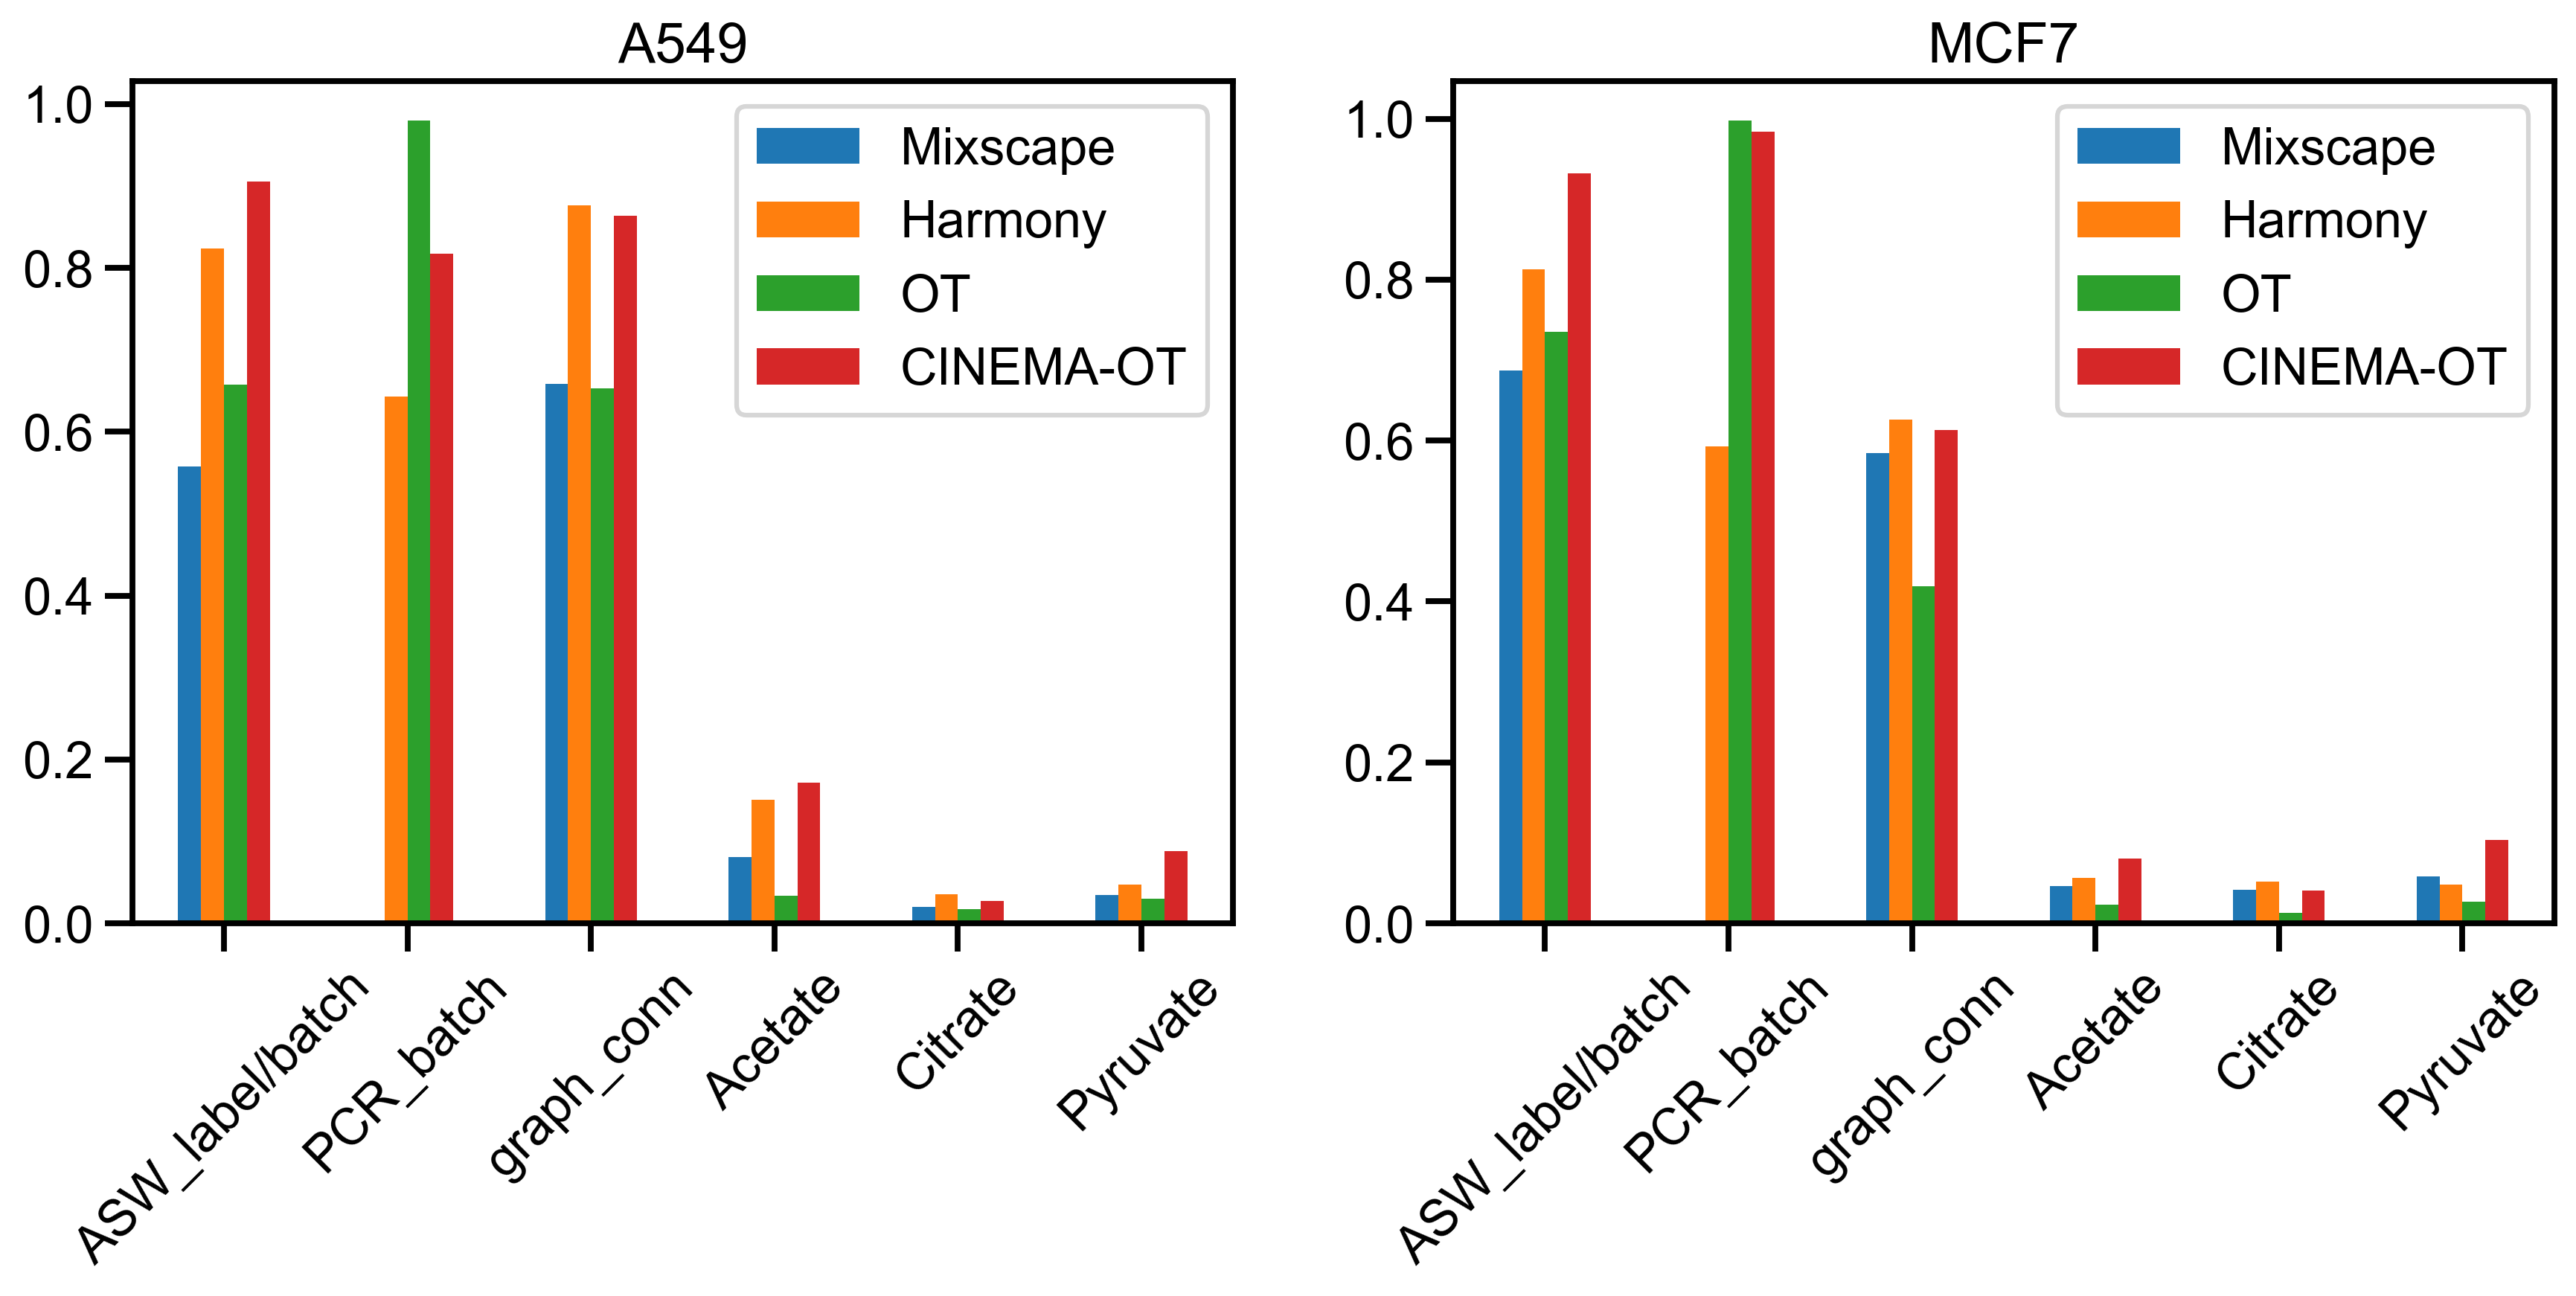

In [37]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
fig, axs = plt.subplots(1,2, figsize=(14, 5))

metrics[metrics.index.isin(['ASW_label/batch','PCR_batch','graph_conn','Acetate','Citrate','Pyruvate'])].plot(kind="bar",ax=axs[0],rot=45)
axs[0].set_title('A549')

metrics2[metrics.index.isin(['ASW_label/batch','PCR_batch','graph_conn','Acetate','Citrate','Pyruvate'])].plot(kind="bar",ax=axs[1],rot=45)
axs[1].set_title('MCF7')